In [36]:
import pandas as pd
import numpy as np
import matplotlib

In [37]:
data = pd.DataFrame(pd.read_csv("E:\git\py-scrape-and-analyze-djinni\scrape_jobs\jobs.csv"))
data

,title,description,location,requirements,published,views,replies,english_level,years_of_experience
0,Senior Python Backend Engineer,Not specified,Україна,"{'PYTHON', 'FAST', 'AWS', 'DJANGO', 'REST'}",8 січня 2024,32,5,Intermediate,5
1,Senior Python Developer_Competency Lead,Not specified,Україна,"{'PYTHON', 'FAST', 'AWS', 'DJANGO', 'REST'}",9 січня 2024,12,0,Upper-Intermediate,5
2,Data and Machine Learning Engineer (Python),"We are, Softwarium — Ukrainian outsourcing IT-...",Україна,"{'AWS', 'PYTHON', 'REST', 'GITHUB'}",8 січня 2024,33,7,Intermediate,5
3,Middle Python Software Engineer (Prom.ua),Not specified,Україна,"{'CSS', 'PYTHON', 'ELASTICSEARCH', 'CI/CD', 'K...",8 січня 2024,152,11,NaN,3
4,Back-End Python (Django) Developer,We are seeking an experienced Python Developer...,Україна,"{'DEVELOPER', 'PYTHON', 'ANGULAR', 'CI/CD'}",8 січня 2024,104,38,Upper-Intermediate,5
...,...,...,...,...,...,...,...,...,...
186,Python + Django,JetUp Digital шукає розробника Python + Django...,Україна,"{'PYTHON', 'DJANGO', 'REST'}",13 грудня 2023,627,193,Pre-Intermediate,1
187,Python (Odoo) Developer,Вітаємо! Ми команда ToDo. Входимо до складу ве...,Україна,"{'CSS', 'HTML', 'GITHUB', 'PYTHON', 'JAVASCRIP...",13 грудня 2023,174,37,NaN,1
188,Pyton Developer 4+ years exp,Responsibilities:,Україна,{'REST'},23 жовтня 2023,44,7,NaN,5
189,Senior - Regular Python Developer ( EST workin...,Not specified,Україна,"{'PYTHON', 'PANDAS', 'AWS', 'SQL', 'AIRFLOW'}",23 листопада 2023,91,14,Upper-Intermediate,3


<Axes: >

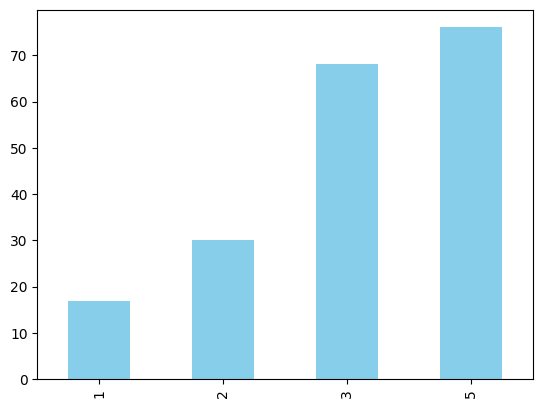

In [38]:
data["years_of_experience"].value_counts().sort_index().plot(kind='bar', color='skyblue')

<Axes: >

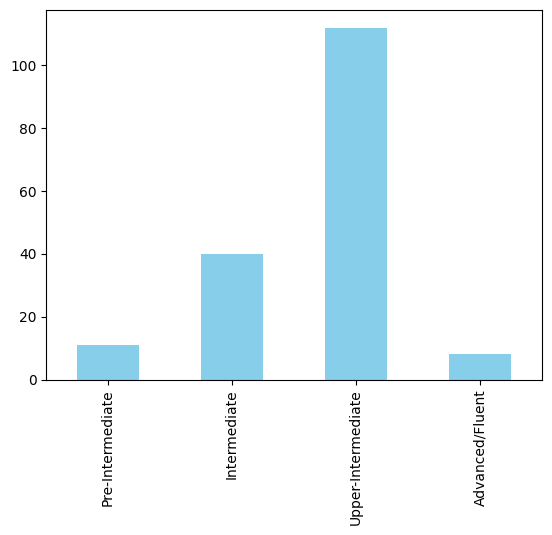

In [39]:
english_levels = ["Pre-Intermediate", "Intermediate", "Upper-Intermediate", "Advanced/Fluent"]

data["english_level"] = pd.Categorical(data["english_level"], categories=english_levels, ordered=True)
data["english_level"].value_counts().sort_index().plot(kind='bar', color='skyblue')

<Axes: >

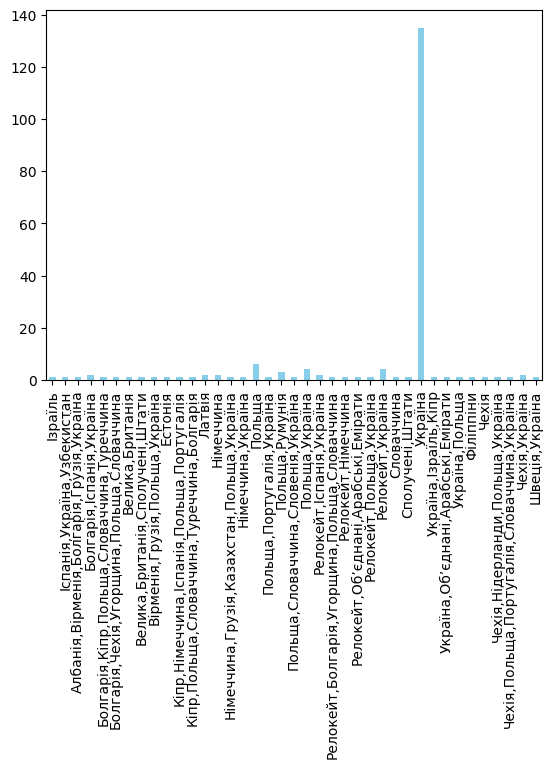

In [54]:
data["location"].value_counts().sort_index().plot(kind='bar', color='skyblue')

In [67]:
unique_values = data["requirements"]
unique_values

AttributeError: 'Series' object has no attribute 'flatten'